## Student: Lilit Beglaryan


## About data:
 retrieved from : https://www.kaggle.com/competitions/titanic/overview

The data is of some passengers of the well-known Titanic ship. While there was some randomness into who survived and who died in this tragic shipwrech, however it seems that some group of passengers were more likely than others to survive. 

The data contains information about passengers
The main goal is to analyze the relationship between the characteristics of passengers and their survival in teh Titanic's shipwrecking. The goal is to predict on unseen data during the test stage. The description of the variables is given bellow:

 Survival -- 0=No  ,  1=Yes    (Target to be predicted)

* PassengerId -- an assigned identifier to each passenger
* Pclass -- (ticket class) 
1=Upper, 2=Middle, 3=Lower
* Name -- name,last name
* Sex -- male/female
* Age -- age in years
* Sibsp -- # of parents / children aboard the Titanic
* Parch -- 	# of parents / children aboard the Titanic

* Ticket -- Ticket number
* Fare	-- Passenger fare
* Cabin	-- Cabin number	

* Embarked -- Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")



In [5]:
train.shape

(891, 12)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.dropna(subset = ["Age"], inplace = True)

In [8]:
print(train.Cabin.isna().sum()) #too many NaN values, so drop
train.drop(columns="Cabin",inplace=True)


529


In [9]:
train.describe(include="all") # the majority of passengers(453)is male,
# most people(554 passengers) embarked from S=Southampton
# 

PassengerId    Survived      Pclass                     Name   Sex  \
count    714.000000  714.000000  714.000000                      714   714   
unique          NaN         NaN         NaN                      714     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   453   
mean     448.582633    0.406162    2.236695                      NaN   NaN   
std      259.119524    0.491460    0.838250                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      222.250000    0.000000    1.000000                      NaN   NaN   
50%      445.000000    0.000000    2.000000                      NaN   NaN   
75%      677.750000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare Embarked  
count   714.000000  714.000000  714.000000     714  714.000000      712  
unique         NaN         NaN         NaN     542         NaN        3  
top            NaN         NaN         NaN  347082         NaN        S  
freq           NaN         NaN         NaN       7         NaN      554  
mean     29.699118    0.512605    0.431373     NaN   34.694514      NaN  
std      14.526497    0.929783    0.853289     NaN   52.918930      NaN  
min       0.420000    0.000000    0.000000     NaN    0.000000      NaN  
25%      20.125000    0.000000    0.000000     NaN    8.050000      NaN  
50%      28.000000    0.000000    0.000000     NaN   15.741700      NaN  
75%      38.000000    1.000000    1.000000     NaN   33.375000      NaN  
max      80.000000    5.000000    6.000000     NaN  512.329200      NaN

In [10]:
train.dropna(axis=0, subset="Embarked", inplace=True) #drop the 2rows where leaving port(Embarked) is missing
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [11]:
y = train[['PassengerId','Survived']].copy()

X = train.drop(train.columns[1],axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X,y ,random_state=104, test_size=0.25, shuffle=True)

print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.head())

(534, 10)
(178, 10)
(178, 2)
     PassengerId  Survived
421          422         0
78            79         1
860          861         0
607          608         1
804          805         1


In [ ]:
 #############################################################

In [12]:
#apply the same process for the data that we need to predict on
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [13]:
test.drop(columns="Cabin",inplace=True) #as the majority of Cabin is missing

In [14]:
# the Ages can be filled with the mean, as the test won't be split into parts
# it is ok to calculate the mean for the whole data
test["Fare"].fillna(test["Fare"].mean(), inplace = True)
test["Age"].fillna(test["Age"].mean(), inplace = True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

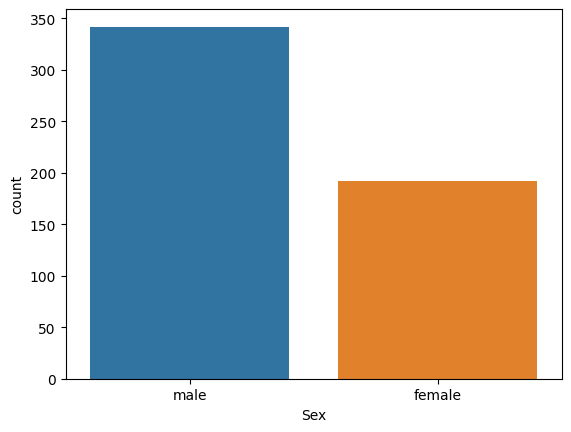

In [17]:
sns.countplot(x = "Sex", data = X_train) #the majority of the passengers in our train sample were male
plt.show()


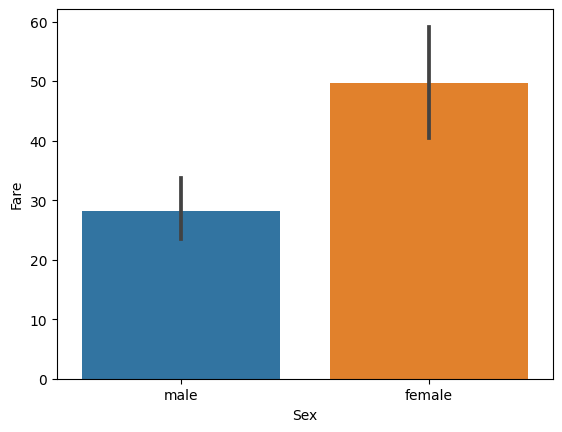

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  534 non-null    int64  
 1   Pclass       534 non-null    int64  
 2   Name         534 non-null    object 
 3   Sex          534 non-null    object 
 4   Age          534 non-null    float64
 5   SibSp        534 non-null    int64  
 6   Parch        534 non-null    int64  
 7   Ticket       534 non-null    object 
 8   Fare         534 non-null    float64
 9   Embarked     534 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 41.8+ KB


In [18]:
sns.barplot(x = "Sex", y = "Fare", data = X_train) #Female passengers spent more on tickets, maybe richer than men
plt.show()
X_train.info()

[Text(0.5, 1.0, "Passengers' Ages w.r.t their Gender")]

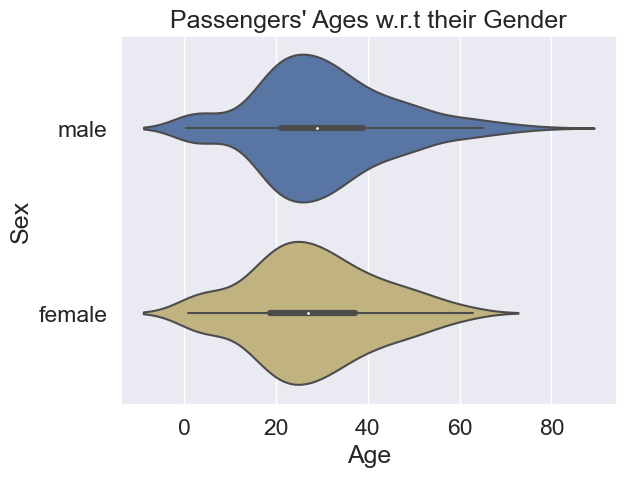

In [19]:
# sns.set_theme()
# sns.set_style("whitegrid")

sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.set(font_scale=1.5)
sns.violinplot(data=X_train, x= 'Age',y='Sex', palette={"male": "b", "female": "y"}, orient="h").set(title="Passengers' Ages w.r.t their Gender")

# the median of females is younger than the males'
#males are right-skewed in terms of their age, i.e. there are more old males than females on the ship
#the IQR of females is a bit larger than for males(the spread of age is more for females)
#for both the age is mostly concentrated between ~~ [20,40]
#the variance of male ages is higher than for females

##


[Text(0.5, 1.0, "Passengers' Ages w.r.t their Gender")]

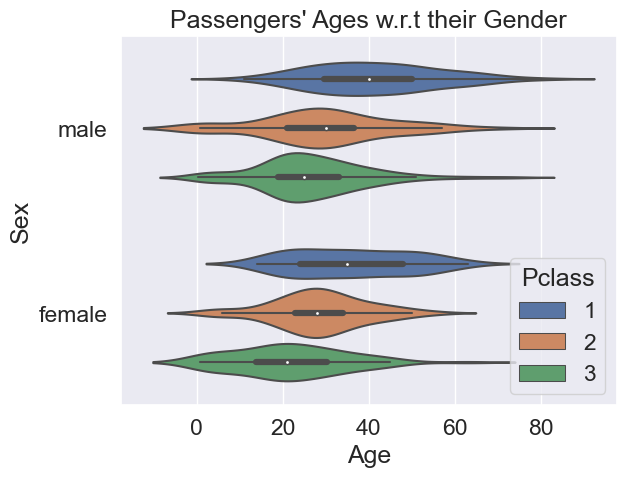

In [20]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.set(font_scale=1.5)
sns.violinplot(data=X_train, x= 'Age',y='Sex', hue="Pclass", orient="h").set(title="Passengers' Ages w.r.t their Gender")

# there are more [20,40]  aged women per Pclass(the wider middle part) than males
#the medians per Pclass are higher for men than women
#the range of age is higher for men than women for Pclass 1 and 2
#

In [21]:
a = X_train.groupby(["Pclass"])["Embarked"].agg(pd.Series.mode).to_frame() #the majority was from port S regardless of the Pclasses
print(a.shape)
print(a)

print("\n")
a = train.groupby(["Sex"])["Survived"].agg(pd.Series.mode).to_frame() #the majority of women was survived
# while the majority of men in our train data died
print(a.shape)
print(a)

print("\n")

a = X_train.groupby(["Ticket"])["Ticket"].count().head() #some types of tickets happen more than once
print(a.shape)
print(a)

(3, 1)
       Embarked
Pclass         
1             S
2             S
3             S


(2, 1)
        Survived
Sex             
female         1
male           0


(5,)
Ticket
110152    2
110413    3
110564    1
110813    1
111320    1
Name: Ticket, dtype: int64


-0.08244586804341386


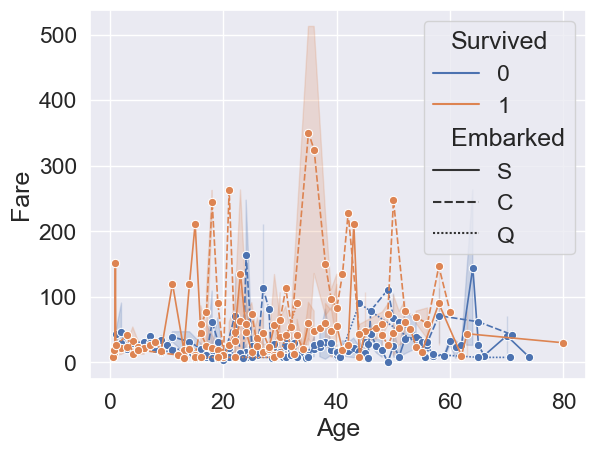

In [22]:
kwargs = dict (linestyle='-.', color='b', marker ='o', linewidth=1.2)
sns.lineplot(data=train,x="Age",y="Fare",hue="Survived",style="Embarked",**kwargs) #the survived have spent more on tickets
#with high confidence level of 0.95, the middle aged people paid more.

print(np.corrcoef(train["Age"],train["Survived"])[0,1]) #-0.08244586804341386 , almost no correlation between surving or not
#and of what age they were

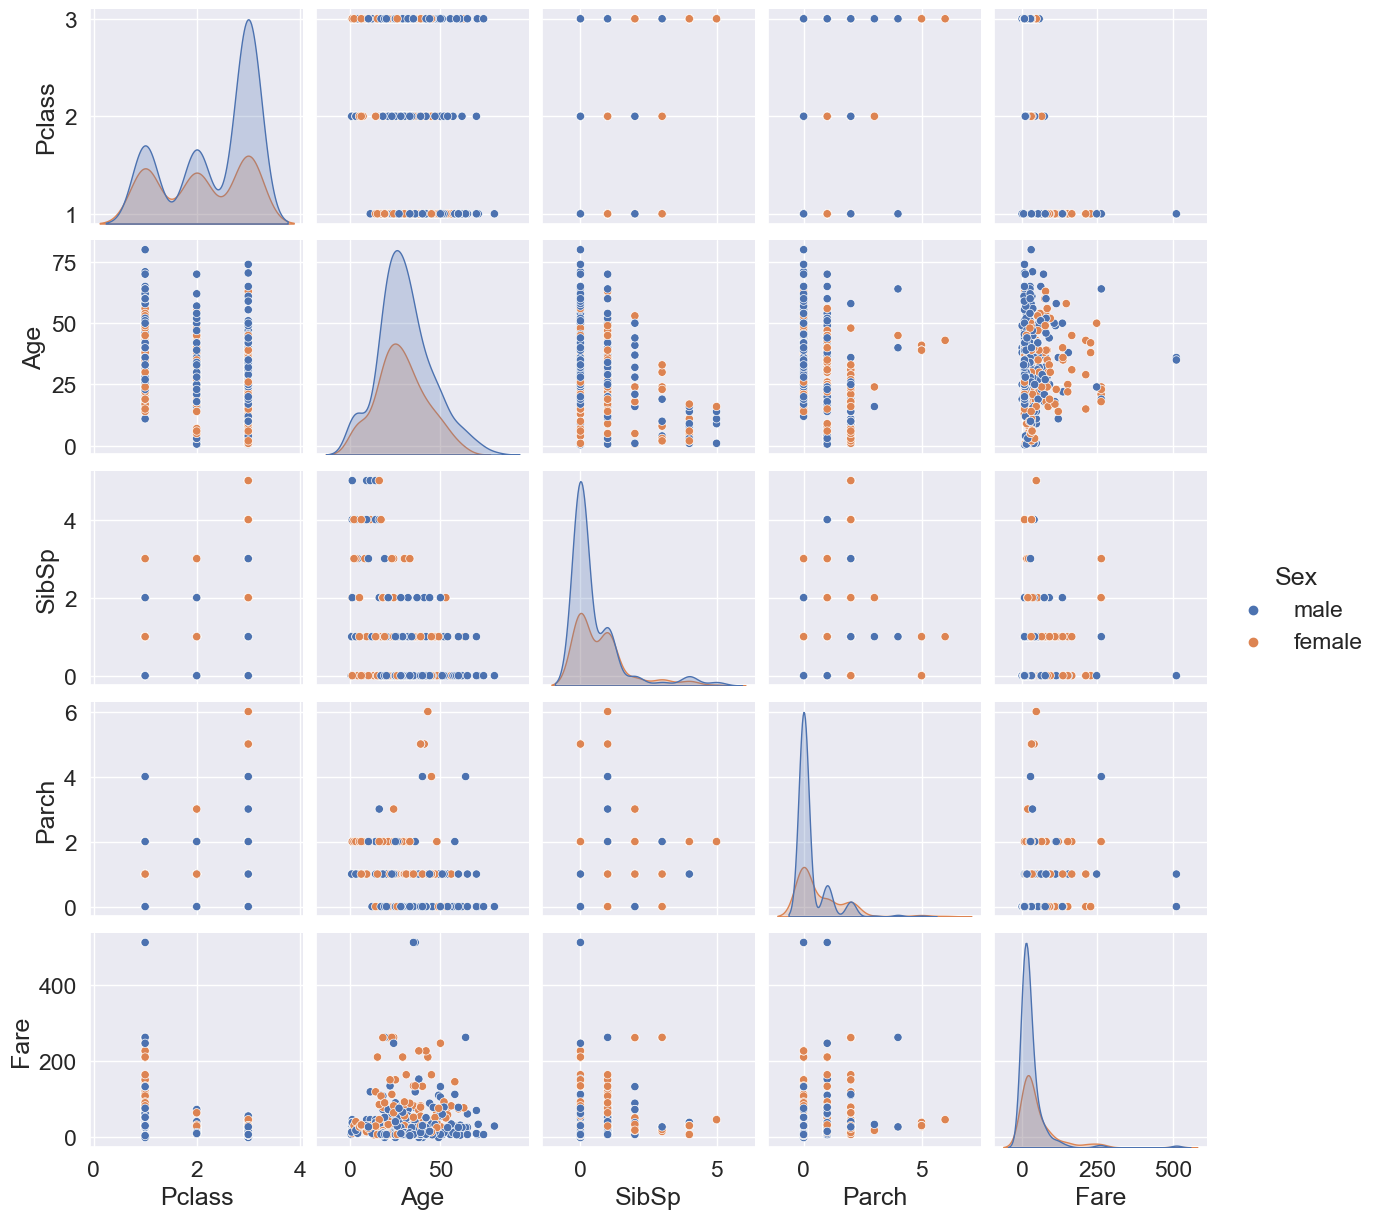

In [23]:
sns.pairplot(data=X_train.iloc[:,1:],hue="Sex")
#AS WE see more blue pints=>more males
# as the parch and sibsp increases(#of parents and siblings on the vacation), the fare decreases
# (probably the family had to pay much so they prefered cheap tickets)
# as the #of siblings and parents increases their ages decrease ????? don't understand how to interpret

# the less siblings you have with you, the older you are, the more siblings with you the younger you are(Age is for you or your siblings???)

plt.show()

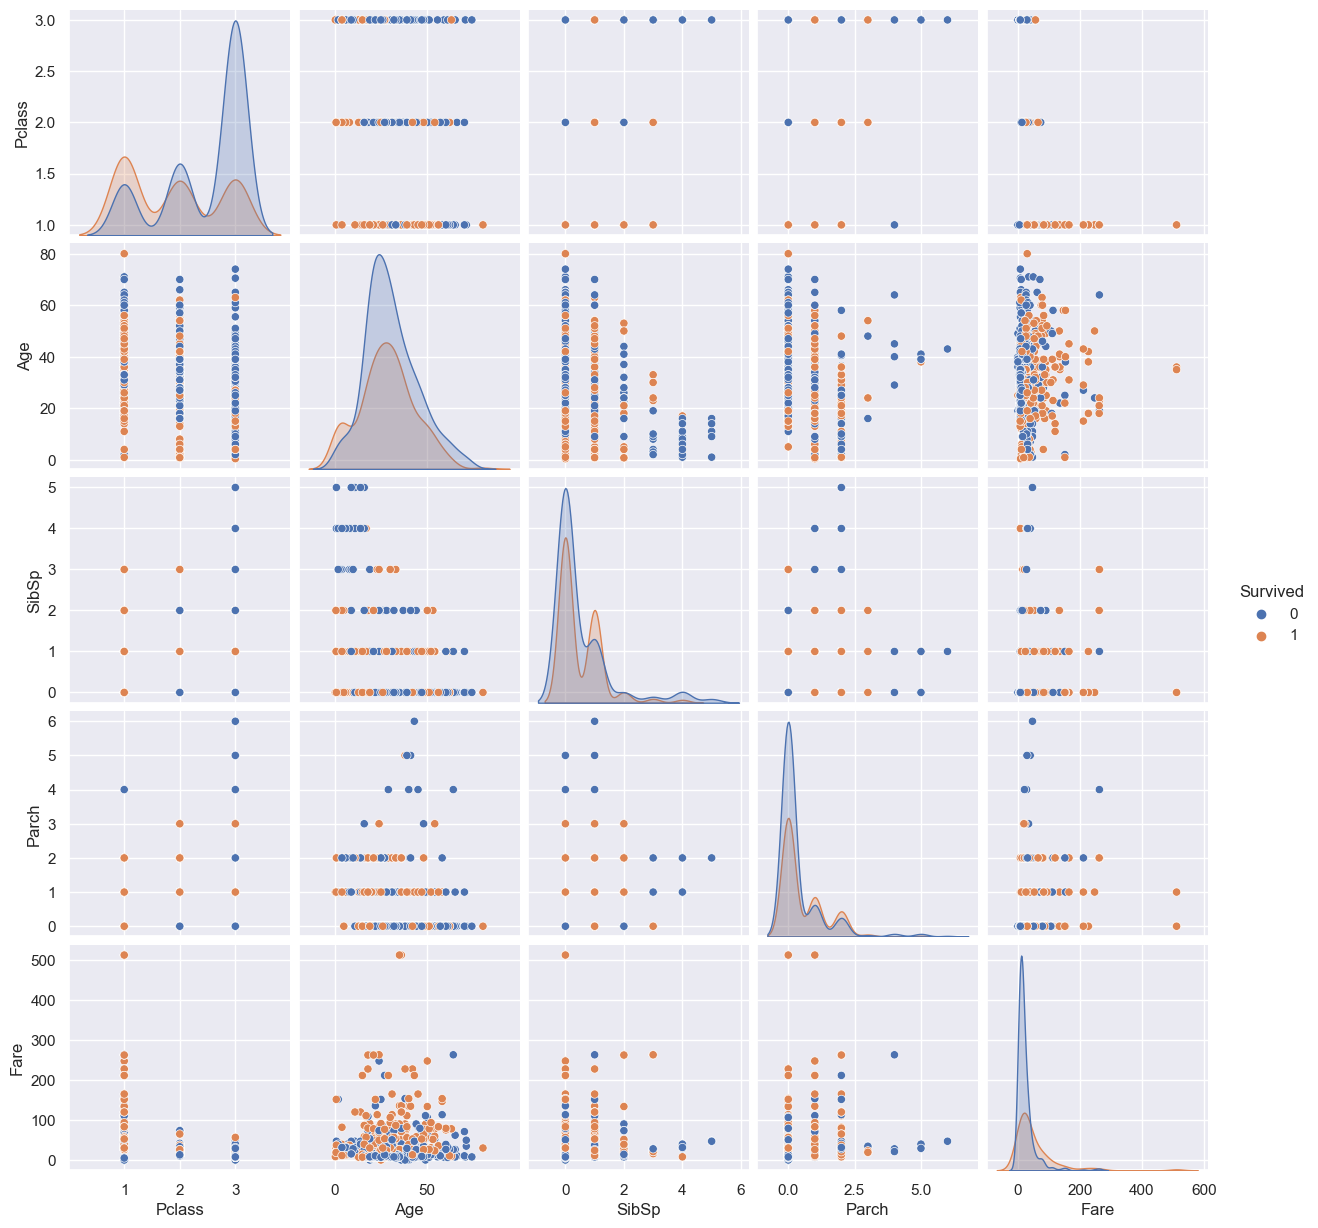

In [33]:
sns.pairplot(data=train.iloc[:,1:],hue="Survived") 
plt.show()

#the less siblings and parents(Parch-Sibsp , diagonal pdfs) were taken , the more the chances a person was not survived(probably did not get help from relatives)
#more survived in Pclass 1
#the higher the tocket fare goes, the younger teh passenger gets, since old people do not like spending much on journeys
#pclass 1 has higher fares not surprisingly and higher survival rate(rich people always benefit)

In [37]:
from pandas.core.reshape.merge import merge
# X_train.merge(y_train, how = 'inner', on = "PassengerId")
y_train = pd.merge(X_train, y_train, how='inner',on="PassengerId")

In [38]:
y_train # don't know why the merge didnot affect the y_train  ???

PassengerId  Pclass_x                           Name_x   Sex_x  Age_x  \
0            422         3              Charters, Mr. David    male  21.00   
1             79         2    Caldwell, Master. Alden Gates    male   0.83   
2            861         3          Hansen, Mr. Claus Peter    male  41.00   
3            608         1      Daniel, Mr. Robert Williams    male  27.00   
4            805         3          Hedman, Mr. Oskar Arvid    male  27.00   
..           ...       ...                              ...     ...    ...   
529          210         1                 Blank, Mr. Henry    male  40.00   
530          820         3     Skoog, Master. Karl Thorsten    male  10.00   
531          316         3  Nilsson, Miss. Helmina Josefina  female  26.00   
532          884         2    Banfield, Mr. Frederick James    male  28.00   
533           92         3       Andreasson, Mr. Paul Edvin    male  20.00   

     SibSp_x  Parch_x          Ticket_x   Fare_x Embarked_x  Pclass_y  \
0          0        0        A/5. 13032   7.7333          Q         3   
1          0        2            248738  29.0000          S         2   
2          2        0            350026  14.1083          S         3   
3          0        0            113804  30.5000          S         1   
4          0        0            347089   6.9750          S         3   
..       ...      ...               ...      ...        ...       ...   
529        0        0            112277  31.0000          C         1   
530        3        2            347088  27.9000          S         3   
531        0        0            347470   7.8542          S         3   
532        0        0  C.A./SOTON 34068  10.5000          S         2   
533        0        0            347466   7.8542          S         3   

                              Name_y   Sex_y  Age_y  SibSp_y  Parch_y  \
0                Charters, Mr. David    male  21.00        0        0   
1      Caldwell, Master. Alden Gates    male   0.83        0        2   
2            Hansen, Mr. Claus Peter    male  41.00        2        0   
3        Daniel, Mr. Robert Williams    male  27.00        0        0   
4            Hedman, Mr. Oskar Arvid    male  27.00        0        0   
..                               ...     ...    ...      ...      ...   
529                 Blank, Mr. Henry    male  40.00        0        0   
530     Skoog, Master. Karl Thorsten    male  10.00        3        2   
531  Nilsson, Miss. Helmina Josefina  female  26.00        0        0   
532    Banfield, Mr. Frederick James    male  28.00        0        0   
533       Andreasson, Mr. Paul Edvin    male  20.00        0        0   

             Ticket_y   Fare_y Embarked_y  Survived  
0          A/5. 13032   7.7333          Q         0  
1              248738  29.0000          S         1  
2              350026  14.1083          S         0  
3              113804  30.5000          S         1  
4              347089   6.9750          S         1  
..                ...      ...        ...       ...  
529            112277  31.0000          C         1  
530            347088  27.9000          S         0  
531            347470   7.8542          S         1  
532  C.A./SOTON 34068  10.5000          S         0  
533            347466   7.8542          S         0  

[534 rows x 20 columns]

<AxesSubplot: >

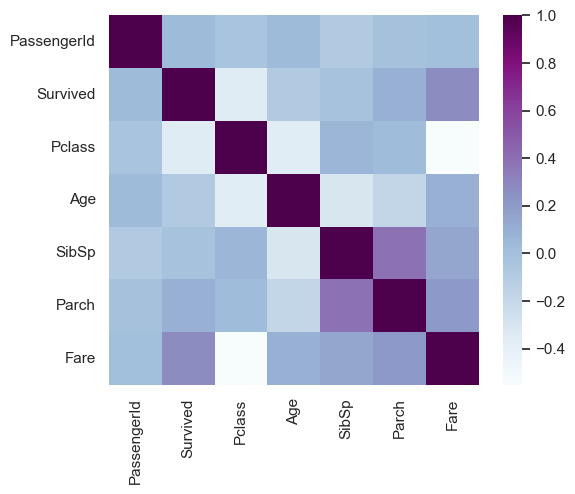

In [30]:
sns.set(font_scale=1)
cor=train.select_dtypes(include=np.number).corr()
sns.heatmap(data=cor,square=True,cmap="BuPu")  #almost all the vars have very low(near to 0 cor)
# Parch is positively cor-ed with the SibSp since the more parents a person takes to the trip, the more siblings and familiy members they get

#Survived is lightly related positively with teh Fare, maybe the more expensive a ticket was, the better equipped cabin was for that person
# and more equipped for emergency scenarios